# Titanic dataset

We will be predicting the likelihood of survival of a passenger with certain features, in the event of Titanic, using data from the passengers who survived.

We will use the Titannic dataset procured by Kaggle competition, having the files "train.csv" used for training and testing purposes, using logistic regression with regularization. The file "Titanic.txt" holds the information regarding the features of the dataset.

In [1]:
#import relevant libraries that will be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
print("Here are the first five training examples printed out:")
print(data.head())
print("The dimensions of this dataset are:", data.shape)

Here are the first five training examples printed out:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


In [2]:
#Now we see that that we have 891 training examples. Now we have to verify if there are any missing values and which features
#have them and how much.

print("Checking to see which features have missing values:\n")
for columnName, columnValue in data.iteritems():
    if(data[columnName].isnull().any()):
        print(columnName, "was found to have missing values of the amount", data[columnName].isnull().sum())

Checking to see which features have missing values:

Age was found to have missing values of the amount 177
Cabin was found to have missing values of the amount 687
Embarked was found to have missing values of the amount 2


In [3]:
#It is obvious that some of the features are irrelevant to the regression analysis, namely PassengerId, Name and Ticket
del data['PassengerId'], data['Name'], data['Ticket']

In [4]:
#Even though the 'Age' and 'Cabin' have 177 and 687 values missing respectively, they are essential in determining whether a
#passenger survived or not. For 'Age' we will choose to replace the NaN values will the mean of all ages [this ensures that
#the missing values won't interfere in the learning model's output] and the 'Cabin' NaN value will be changed to '0' in count
#which means for any test example, if cabin value is missing, it will not be used as a feature while computing the output.
#For 'Embarked' only two missing values are there, we can just replace the NaN values with 0 as well.

data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = data['Cabin'].fillna('0')
data['Embarked'] = data['Embarked'].fillna('0')

print(data.head())
data.info()

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500     0        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250     0        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500     0        S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), objec

In [5]:
#As we can see, the 'Age' column is now non-null. We can see that we have 3 object type features that we need to convert
#numercial values. However, in 'Cabin' we can clearly see that most cabin numbers are different, but their first letter shows
#which deck they are in, which is obviously a feature that can strongly predict the survivalhood. We will take the first letter
#and replace the corresponding value in the dataset.

for i in range(891):
    string = data['Cabin'][i]
    data['Cabin'][i] = string[0]

num_change = 0
for (columnName, columnData) in data.iteritems():
    if(data.dtypes[columnName]==object):
        num_change += 1
        count = 1
        dictionary = {}
        for i in range(891):
            if(dictionary.get(columnData[i])==None):
                if(columnData[i]=='0'): dictionary[columnData[i]] = 0
                else: dictionary[columnData[i]] = count
                count += 1
            else: continue
        data[columnName] = data[columnName].replace(dictionary)
print("The number of changes made to the dataset:", num_change)
print("Displaying the info for all columns for sanity check: ", data.info())
print("Printing the modified dataset:\n", data.head())

The number of changes made to the dataset: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
Displaying the info for all columns for sanity check:  None
Printing the modified dataset:
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         0       3    1  22.0      1      0   7.2500      0         1
1         1       1    2  38.0      1      0  71.2833      2         2
2         1       3    2  26.0      0      0   7.9250      0      

C:\Users\SHWETA~1\AppData\Local\Temp/ipykernel_1924/2246013458.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][i] = string[0]


In [6]:
#Having successfully pre-processed the data, we can now proceed with the next stage, which is splitting this dataset into
#two parts, training and testing set in 80%-20% configuration.

xtrain = data[:713]
ytrain = np.array(xtrain['Survived']).reshape(713, 1)
del xtrain['Survived']
print("The dimensions of the training sets are:", xtrain.shape, ytrain.shape)

xtest = data[713:]
ytest = np.array(xtest['Survived']).reshape(178, 1)
del xtest['Survived']
print("The dimensions of the training sets are:", xtest.shape, ytest.shape)

The dimensions of the training sets are: (713, 8) (713, 1)
The dimensions of the training sets are: (178, 8) (178, 1)


In [7]:
#Feature scaling is required as 'Fare' and 'Age' are much bigger than the other int64 values in the training set. We will use
#mean normalisation with standard deviation division.
def normalise(X):
    i = 0
    for columnName, columnValue in X.iteritems():
        if(X.std(axis=0)[i]!=0): X[columnName] = (X[columnName]-X.mean(axis=0)[i])/X.std(axis=0)[i]
        i +=1

normalise(xtrain)
print("The amended dataset becomes:\n", xtrain.head())

C:\Users\SHWETA~1\AppData\Local\Temp/ipykernel_1924/1828463240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(X.std(axis=0)[i]!=0): X[columnName] = (X[columnName]-X.mean(axis=0)[i])/X.std(axis=0)[i]


The amended dataset becomes:
      Pclass       Sex       Age     SibSp    Parch      Fare   Cabin  Embarked
0  0.833679 -0.747923 -0.613714  0.443010 -0.46942 -0.519835 -0.4739 -0.575941
1 -1.548738  1.335160  0.615649  0.443010 -0.46942  0.796531  0.4673  0.973667
2  0.833679  1.335160 -0.306373 -0.497068 -0.46942 -0.505959 -0.4739 -0.575941
3 -1.548738  1.335160  0.385144  0.443010 -0.46942  0.422727  0.4673 -0.575941
4  0.833679 -0.747923  0.385144 -0.497068 -0.46942 -0.503389 -0.4739 -0.575941


In [8]:
#We now need to append the bias column of ones for training the model.

X0train = np.ones(len(xtrain)).reshape(713, 1)
Xtrain = np.append(X0train, xtrain, axis=1).reshape(713, 9)

In [9]:
#Here we define the sigmoid function, cost function [with regularization] and the gradient descent function.

def sigmoid(a):
    e = 2.718281828459045
    return 1/(1+e**(-a))

def computeCost(X, y, theta, lambda1):
    theta1 = np.array(theta)
    theta1[0] = 0
    J = ((-1/m)*(np.sum((ytrain.transpose() @ np.log10(sigmoid(X @ theta))) + ((1-y.transpose()) @ np.log10(1-sigmoid(X @ theta)))))) + (lambda1/(2*m)*np.sum(np.square(theta1)))
    return J;

def gradientDescent(X, y, theta, alpha, lambda1, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta1 = np.array(theta)
        theta1[0] = 0
        theta = theta - (alpha/m)*((X.transpose() @ (sigmoid(X @ theta)-y))+(lambda1*theta1))
        J_history[iter] = computeCost(X, y, theta, lambda1)
    return [theta, J_history]

In [10]:
m = 713
lambda1 = 1
theta = np.zeros(9).reshape(9, 1)
print("Cost when the parameters are zeros:", computeCost(Xtrain, ytrain, theta, lambda1))

Cost when the parameters are zeros: 0.3010299956639812


In [11]:
#Now we will train the model using the parameters shown below.

theta = np.zeros(9).reshape(9, 1)
alpha, lambda1, iterations, m = 0.05, 0.5, 2000, 713

returned = gradientDescent(Xtrain, ytrain, theta, alpha, lambda1, iterations, m)
theta = returned[0]
J_history = returned[1]
print("The final cost value is:", computeCost(Xtrain, ytrain, theta, lambda1))

The final cost value is: 0.19598021838587754


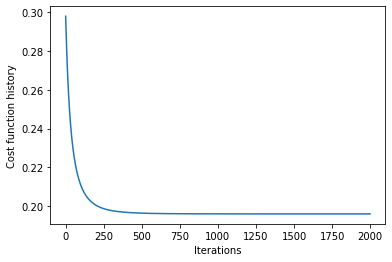

In [12]:
#We will also plot the value of the cost function after each iteration, to see the value reach a minimum and converge to a
#stabalised value.
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(2000), J_history)

In [13]:
#As we can see, the model has converged into a constant value, that means our regression model is created sucessfully.
#Let's compare the results with the actual values. We will consider our test set and compare our training model values
#with the the original. We will check for our accuracy percentage on the test set.

X0test = np.ones(len(xtest)).reshape(178, 1)
normalise(xtest)
Xtest = np.append(X0test, xtest, axis=1).reshape(178, 9)
prediction_real = sigmoid(Xtest @ theta)
prediction = np.zeros(len(xtest)).reshape(178, 1)
accuracy = np.zeros(len(xtest)).reshape(178, 1)
for i in range(178):
    if(prediction_real[i]>0.7): prediction[i] = 1
for i in range(178):
    if(prediction[i]==ytest[i]): accuracy[i] = 1
print("The accuracy percentage is:", accuracy.mean()*100)

The accuracy percentage is: 83.14606741573034


C:\Users\SHWETA~1\AppData\Local\Temp/ipykernel_1924/1828463240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(X.std(axis=0)[i]!=0): X[columnName] = (X[columnName]-X.mean(axis=0)[i])/X.std(axis=0)[i]


We have successfully predicted accurately for about 83% of the passengers in the test set, which is a good score. We didn't make use of multivariate logistic regression, which could make the algorithm slightly more accurate.

Another thing to realise is that many of the features many not have collinearity with the target variable [Survived] and hence, those features may confuse the model, making it more inaccurate. Checking each feature with the target variable to access whether is relevant or not needs to be done.

Certain considerations were not given, such as while replacing NaN in age, mean of the entire set was taken, while we could have taken the mean in relation to the class [it takes more time to build wealth, which means mean of age in first class is probably more than mean of third class] and the age of each of of the sex in each class [women are usually younger]. The colinearity of the features with the targest variable was not tested either.